# Analysis of the abide dataset

In [2]:
import pandas as pd
import numpy as np
# import statsmodels.discrete.discrete_model as sm
import statsmodels.api as sm
import scipy.stats as sst
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
pwd

'/home/jb/code/repronim/simple2_analysis'

In [4]:
relative_path_filename = './abide1.csv'

In [26]:
# Load in the dataset, appending 'nd' to the list of possible na_values
hie = pd.read_csv(relative_path_filename, na_values='nd')
original_col_names = list(hie)
print(original_col_names[:10])

# column names are unique
assert len(original_col_names) == len(set(original_col_names))

['iri', 'ILX:0381414', 'ILX:0381401', 'ILX:0381403', 'ILX:0381410', 'ILX:0381415', 'ILX:0381417', 'ILX:0381419', 'ILX:0381436', 'ILX:0381423']


In [6]:
def get_structure_idx(ilx, dataframe):
    """
    get indexes of the column names that contain ilx
    """
    col_names = list(dataframe)
    idxs = [idx for (idx, value) in enumerate(col_names) if ilx in value]
    return(idxs)

In [7]:
def get_structure_col_names(ilx, dataframe):
    """
    get column names that contain ilx
    """
    col_names = list(dataframe)
    cnames = [cname for cname in col_names if ilx in cname]
    return(cnames)

In [12]:
get_structure_col_names('ILX:0381415', hie)

['ILX:0381415', 'ILX:0381415.1', 'ILX:0381415.2']

In [15]:
ilx_bases = [ilx for ilx in original_col_names if  '.' not in ilx 
                                              and ilx[:4] == 'ILX:']
print(len(ilx_bases))

45


In [16]:
structures_names = [get_structure_col_names(ilx, hie) for ilx in ilx_bases]

In [17]:
print(structures_names)

[['ILX:0381414', 'ILX:0381414.1', 'ILX:0381414.2'], ['ILX:0381401', 'ILX:0381401.1', 'ILX:0381401.2'], ['ILX:0381403', 'ILX:0381403.1', 'ILX:0381403.2'], ['ILX:0381410', 'ILX:0381410.1', 'ILX:0381410.2'], ['ILX:0381415', 'ILX:0381415.1', 'ILX:0381415.2'], ['ILX:0381417', 'ILX:0381417.1', 'ILX:0381417.2'], ['ILX:0381419', 'ILX:0381419.1', 'ILX:0381419.2'], ['ILX:0381436', 'ILX:0381436.1', 'ILX:0381436.2'], ['ILX:0381423', 'ILX:0381423.1', 'ILX:0381423.2'], ['ILX:0381425', 'ILX:0381425.1', 'ILX:0381425.2'], ['ILX:0381432', 'ILX:0381432.1', 'ILX:0381432.2'], ['ILX:0381437', 'ILX:0381437.1', 'ILX:0381437.2'], ['ILX:0381439', 'ILX:0381439.1', 'ILX:0381439.2'], ['ILX:0381441', 'ILX:0381441.1', 'ILX:0381441.2'], ['ILX:0381394', 'ILX:0381394.1', 'ILX:0381394.2'], ['ILX:0381390', 'ILX:0381390.1'], ['ILX:0381396', 'ILX:0381396.1'], ['ILX:0381406'], ['ILX:0381428'], ['ILX:0381393'], ['ILX:0381408'], ['ILX:0381430'], ['ILX:0381443'], ['ILX:0381395'], ['ILX:0381413', 'ILX:0381413.1'], ['ILX:0381411

In [19]:
[hie[roi][1] for roi in structures_names[0]]

['FSL', 'FreeSurfer', 'ANTS']

In [20]:
def get_data_for_regions(regions, dataframe):
    """
    
    """
    col_names = list(dataframe)
    return np.asarray( [ [float(x) for x in dataframe[roi][4:]] for roi in regions])

In [21]:
rois = structures_names[1]
print(rois)
data = get_data_for_regions(rois, hie)
data.shape

['ILX:0381401', 'ILX:0381401.1', 'ILX:0381401.2']


(3, 981)

In [22]:
# remove nan lines
data_not_nan = ~np.isnan(data)
to_keep = np.all(data_not_nan, axis=0)
data_ok = data[:,to_keep]

In [23]:
data.shape
data_ok.shape

(3, 755)

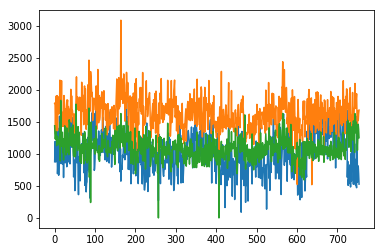

In [24]:
a = plt.plot(data_ok.T)

In [33]:
roi = l3rois[0]
hie[roi[0]][0]

'left nucleus accumbens volume'

In [30]:
cc = np.corrcoef(data_ok)
cc.shape

(3, 3)

In [34]:
l3rois = [rois for rois in structures_names if len(rois) == 3]
correlations = []
sample_size = []
roi_name = []

for rois in l3rois:
    roi_name.append(hie[rois[0]][0])
    data = get_data_for_regions(rois, hie)
    data_not_nan = ~np.isnan(data)
    data_ok = data[:,np.all(data_not_nan, axis=0)]
    sample_size.append(data_ok.shape[1])
    cc = np.corrcoef(data_ok)
    correlations.append([cc[0,1], cc[1,2], cc[0,2]])
    

In [59]:
for roi, ccoeff in zip(roi_name, correlations):
    print("{0:<35}:".format(roi) + " {:.3} {:.3} {:.3}".format(ccoeff[0], ccoeff[1], ccoeff[2]))

    

left nucleus accumbens volume      : 0.0772 0.11 0.441
left amygdala volume               : 0.25 0.536 0.125
left caudate nucleus volume        : 0.631 0.812 0.7
left hippocampus volume            : 0.498 0.779 0.471
left pallidum volume               : 0.492 0.71 0.541
left putamen volume                : 0.574 0.875 0.606
left thalamus volume               : 0.532 0.81 0.592
right nucleus accumbens volume     : 0.178 -0.00759 -0.00147
right amygdala volume              : 0.165 0.555 0.094
right caudate nucleus volume       : 0.584 0.767 0.622
right hippocampus volume           : 0.548 0.639 0.466
right pallidum volume              : 0.446 0.282 0.217
right putamen volume               : 0.574 0.702 0.515
right thalamus volume              : -0.155 0.727 -0.377
cerebrum cerebral spinal fluid volume: 0.271 0.897 0.169


In [41]:
to_print = [(roi_name[i]+':', correlations[i]) for i in range(len(correlations))]
[print(a) for a in to_print];

('left nucleus accumbens volume:', [0.07719297940365472, 0.1097445555866944, 0.441352960298365])
('left amygdala volume:', [0.24983515711952548, 0.5363314545071453, 0.12468536800600702])
('left caudate nucleus volume:', [0.6306381931440506, 0.8117749202542225, 0.7003008907977459])
('left hippocampus volume:', [0.49831235224125364, 0.7788182490060742, 0.47097964885921273])
('left pallidum volume:', [0.4922462184294826, 0.7103577366415592, 0.5413166461664558])
('left putamen volume:', [0.5741632019007576, 0.8747549788374294, 0.6061535073193455])
('left thalamus volume:', [0.5320267219574479, 0.8104620738432136, 0.5923989054242501])
('right nucleus accumbens volume:', [0.17753345406646204, -0.007587753068080173, -0.00147013856943137])
('right amygdala volume:', [0.16483270026333996, 0.5549251811673716, 0.09402016586198175])
('right caudate nucleus volume:', [0.5840541771082339, 0.7670416506146263, 0.6224866387321564])
('right hippocampus volume:', [0.5483216991348882, 0.6389741821947024, 